In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [2]:
from torch.utils.tensorboard import SummaryWriter

In [27]:
writer = SummaryWriter("runs/mnist5")

In [4]:
device = torch.device('mps')

In [28]:
input_size = 784 # 24 x 24
hidden_size = 100
num_class = 10
num_epochs = 30
batch_size = 100
lr = 0.001

In [6]:
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor())

In [7]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

torch.Size([100, 1, 28, 28])
torch.Size([100])


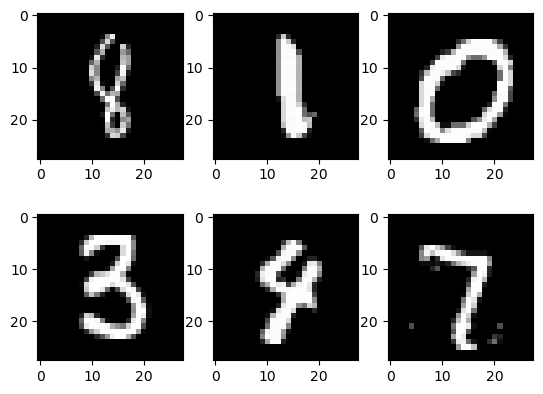

In [8]:
examples = iter(train_loader)
samples, labels = next(examples)
print(samples.shape)
print(labels.shape)
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(samples[i][0], cmap='gray')
# plt.show()

In [9]:
img_grid = torchvision.utils.make_grid(samples)
writer.add_image('images', img_grid, 0)

In [10]:
class NuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        return out

In [29]:
model = NuralNet(input_size, hidden_size, num_class).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
n_total_steps = len(train_loader)

In [12]:
writer.add_graph(model.cpu(), samples.reshape(-1, 28*28))

In [30]:
model = model.to(device)
running_loss = 0.0
running_correct = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        outputs = model(images)
        
        loss = criterion(outputs, labels)
        
        optimizer.zero_grad()
        
        loss.backward()
        
        optimizer.step()
        
        running_loss += loss.item()
        
        _, predictions = torch.max(outputs, 1)
        running_correct += (predictions == labels).sum().item()
        
        
        if (i+1) % 300 == 0:
            print(f"Epoch {epoch+1}/{num_epochs}, Step {i+1}/{n_total_steps}, loss = {loss.item():5f}")
            writer.add_scalar('training loss', running_loss / 100, epoch*n_total_steps + i)
            writer.add_scalar('accuracy', running_correct / 100, epoch*n_total_steps + i)
            running_loss = 0.0
            running_correct = 0
            
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        outputs = model(images)
        
        _, predictions = torch.max(outputs, 1)
        n_samples += labels.shape[0]
        n_correct += (predictions == labels).sum().item()
        
    acc = 100*n_correct/n_samples
    print(f"Accuracy = {acc}")

Epoch 1/30, Step 300/600, loss = 0.340646
Epoch 1/30, Step 600/600, loss = 0.123187
Epoch 2/30, Step 300/600, loss = 0.296114
Epoch 2/30, Step 600/600, loss = 0.102885
Epoch 3/30, Step 300/600, loss = 0.185122
Epoch 3/30, Step 600/600, loss = 0.132312
Epoch 4/30, Step 300/600, loss = 0.089423
Epoch 4/30, Step 600/600, loss = 0.115253
Epoch 5/30, Step 300/600, loss = 0.111323
Epoch 5/30, Step 600/600, loss = 0.087706
Epoch 6/30, Step 300/600, loss = 0.070117
Epoch 6/30, Step 600/600, loss = 0.085459
Epoch 7/30, Step 300/600, loss = 0.042322
Epoch 7/30, Step 600/600, loss = 0.076444
Epoch 8/30, Step 300/600, loss = 0.037112
Epoch 8/30, Step 600/600, loss = 0.038664
Epoch 9/30, Step 300/600, loss = 0.083594
Epoch 9/30, Step 600/600, loss = 0.032122
Epoch 10/30, Step 300/600, loss = 0.010991
Epoch 10/30, Step 600/600, loss = 0.017584
Epoch 11/30, Step 300/600, loss = 0.030224
Epoch 11/30, Step 600/600, loss = 0.006136
Epoch 12/30, Step 300/600, loss = 0.024344
Epoch 12/30, Step 600/600, lo